# Credit Card Fraud Detection


## Libraries 

In [3]:
# Perform logistic regression on the fraud data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:

df = pd.read_csv('creditcard.csv')

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\sks4u\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

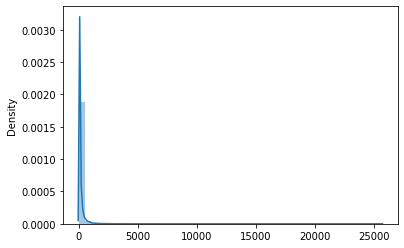

In [14]:
amount = [df['Amount'].values]
sns.distplot(amount)

In [15]:
time = [df['Time'].values]

C:\Users\sks4u\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

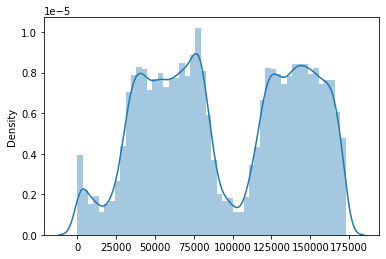

In [16]:
sns.distplot(time)

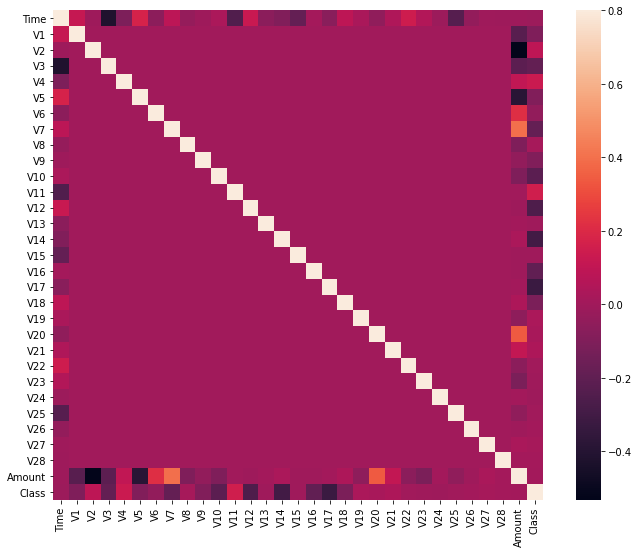

In [17]:
# Correlation matrix
corr = df.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True)
plt.show()

In [18]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Unbalanced Data

## Separating the data for analysis

In [19]:
 # separating the data for analysis
X = df[df.Class == 0]
Y = df[df.Class == 1]

In [20]:
X.shape
Y.shape

(492, 31)

In [21]:
X_sample = X.sample(n = 492, random_state = 1)

In [22]:
new_dataset = pd.concat([X_sample, Y], axis = 0)

In [23]:
# New dataset head
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106066,69808.0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00,0
102005,68015.0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89,0
278450,168231.0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99,0
120218,75751.0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80,0
258527,158694.0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48,0


In [24]:
# Class head of new_dataset
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

### Data is balanced now

In [25]:
x = new_dataset.drop(['Class'], axis = 1)
y = new_dataset['Class']

In [26]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
106066,69808.0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,1.031270,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00
102005,68015.0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,-0.299226,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89
278450,168231.0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.073391,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99
120218,75751.0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.106821,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80
258527,158694.0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.013126,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [27]:
y

106066    0
102005    0
278450    0
120218    0
258527    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [28]:
# Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [29]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


## Random Forest Classifier

In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [31]:
#Accuracy
acc = accuracy_score(y_test, y_pred)
acc

0.9289340101522843

In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
x_pred = model.predict(x_test)
trainingset_accuracy = accuracy_score(y_test, x_pred)
trainingset_accuracy


C:\Users\sks4u\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9644670050761421

In [33]:
# print accuracy of random forest classifier and logistic regression
print("Accuracy of Random Forest Classifier: ", round(acc, 2))
print("Accuracy of Logistic Regression: ", round(trainingset_accuracy, 2))

Accuracy of Random Forest Classifier:  0.93
Accuracy of Logistic Regression:  0.96
